In [1]:
import numpy as np
import pandas as pd

### Groupby

- SQL groupby 명령어와 같음
- split → apply → combine 과정을 거쳐 연산함

In [2]:
ipl_data = {'Team': ['Riders', 'Riders', 'Devils', 'Devils', 'Kings',
         'kings', 'Kings', 'Kings', 'Riders', 'Royals', 'Royals', 'Riders'],
         'Rank': [1, 2, 2, 3, 3,4 ,1 ,1,2 , 4,1,2],
         'Year': [2014,2015,2014,2015,2014,2015,2016,2017,2016,2014,2015,2017],
         'Points':[876,789,863,673,741,812,756,788,694,701,804,690]}

df = pd.DataFrame(ipl_data)
df

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863
3,Devils,3,2015,673
4,Kings,3,2014,741
5,kings,4,2015,812
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
9,Royals,4,2014,701


In [3]:
df.groupby("Team")["Points"].sum()

Team
Devils    1536
Kings     2285
Riders    3049
Royals    1505
kings      812
Name: Points, dtype: int64

- 한 개 이상의 column을 묶을 수 있음

In [4]:
df.groupby(["Team", "Year"])["Points"].sum()

Team    Year
Devils  2014    863
        2015    673
Kings   2014    741
        2016    756
        2017    788
Riders  2014    876
        2015    789
        2016    694
        2017    690
Royals  2014    701
        2015    804
kings   2015    812
Name: Points, dtype: int64

### Hierarchical index

- Groupby 명령의 결과물도 결국은 dataframe
- 두 개의 column으로 groupby를 할 경우, index가 두 개 생성

In [5]:
h_index = df.groupby(["Team", "Year"])["Points"].sum()
h_index

Team    Year
Devils  2014    863
        2015    673
Kings   2014    741
        2016    756
        2017    788
Riders  2014    876
        2015    789
        2016    694
        2017    690
Royals  2014    701
        2015    804
kings   2015    812
Name: Points, dtype: int64

In [6]:
h_index.index

MultiIndex([('Devils', 2014),
            ('Devils', 2015),
            ( 'Kings', 2014),
            ( 'Kings', 2016),
            ( 'Kings', 2017),
            ('Riders', 2014),
            ('Riders', 2015),
            ('Riders', 2016),
            ('Riders', 2017),
            ('Royals', 2014),
            ('Royals', 2015),
            ( 'kings', 2015)],
           names=['Team', 'Year'])

In [7]:
h_index["Devils":"Kings"]

Team    Year
Devils  2014    863
        2015    673
Kings   2014    741
        2016    756
        2017    788
Name: Points, dtype: int64

### Hierarchical index - unstack()

- Group으로 묶여진 데이터를 matrix 형태로 전환해줌

In [8]:
h_index.unstack().fillna(0)      # fillna로 NaN값 제거

Year,2014,2015,2016,2017
Team,,,,
Devils,863.0,673.0,0.0,0.0
Kings,741.0,0.0,756.0,788.0
Riders,876.0,789.0,694.0,690.0
Royals,701.0,804.0,0.0,0.0
kings,0.0,812.0,0.0,0.0


### Hierarchical index - swaplevel

- Index level을 변경할 수 있음

In [9]:
h_index.swaplevel()

Year  Team  
2014  Devils    863
2015  Devils    673
2014  Kings     741
2016  Kings     756
2017  Kings     788
2014  Riders    876
2015  Riders    789
2016  Riders    694
2017  Riders    690
2014  Royals    701
2015  Royals    804
      kings     812
Name: Points, dtype: int64

In [10]:
h_index.swaplevel().sort_index(level = 0)

Year  Team  
2014  Devils    863
      Kings     741
      Riders    876
      Royals    701
2015  Devils    673
      Riders    789
      Royals    804
      kings     812
2016  Kings     756
      Riders    694
2017  Kings     788
      Riders    690
Name: Points, dtype: int64

### Hierarchical index - operations

- Index level을 기준으로 기본 연산 수행 가능

In [11]:
h_index.sum(level = 0)

Team
Devils    1536
Kings     2285
Riders    3049
Royals    1505
kings      812
Name: Points, dtype: int64

In [12]:
h_index.sum(level = 1)

Year
2014    3181
2015    3078
2016    1450
2017    1478
Name: Points, dtype: int64

### Groupby - grouped

- Groupby에 의해 Split된 상태를 추출 가능함

In [13]:
grouped = df.groupby("Team")

# Tuple 형태로 그룹의 Key값, Value값이 추출됨
for name, group in grouped:
    print(name)     # type : 'str'
    print(group)    # type : 'DataFrame'

Devils
     Team  Rank  Year  Points
2  Devils     2  2014     863
3  Devils     3  2015     673
Kings
    Team  Rank  Year  Points
4  Kings     3  2014     741
6  Kings     1  2016     756
7  Kings     1  2017     788
Riders
      Team  Rank  Year  Points
0   Riders     1  2014     876
1   Riders     2  2015     789
8   Riders     2  2016     694
11  Riders     2  2017     690
Royals
      Team  Rank  Year  Points
9   Royals     4  2014     701
10  Royals     1  2015     804
kings
    Team  Rank  Year  Points
5  kings     4  2015     812


- 특정 Key값을 가진 그룹의 정보만 추출 가능

In [14]:
grouped.get_group("Devils")

,Team,Rank,Year,Points
2,Devils,2,2014,863
3,Devils,3,2015,673


- 추출된 group 정보에는 세 가지 유형의 apply가 가능함
    - Aggregation : 요약된 통계정보를 추출해 줌
    - Transformation : 해당 정보를 변환해줌
    - filter : 특정 정보를 제거하여 보여주는 필터링 기능

### Groupby - Aggregation

In [15]:
grouped.agg(sum)

,Rank,Year,Points
Team,,,
Devils,5,4029,1536
Kings,5,6047,2285
Riders,7,8062,3049
Royals,5,4029,1505
kings,4,2015,812


In [16]:
grouped.agg(np.mean)

,Rank,Year,Points
Team,,,
Devils,2.500000,2014.500000,768.000000
Kings,1.666667,2015.666667,761.666667
Riders,1.750000,2015.500000,762.250000
Royals,2.500000,2014.500000,752.500000
kings,4.000000,2015.000000,812.000000


In [17]:
# 특정 column에 여러 개의 function을 apply할 수도 있음

grouped['Points'].agg([np.sum, np.mean, np.std])

,sum,mean,std
Team,,,
Devils,1536,768.000000,134.350288
Kings,2285,761.666667,24.006943
Riders,3049,762.250000,88.567771
Royals,1505,752.500000,72.831998
kings,812,812.000000,NaN


### Groupby - Transformation

- Aggregation과 달리 key값 별로 요약된 정보가 아닌 전체 데이터 대상
- 개별 데이터의 변환을 지원함

In [18]:
df

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863
3,Devils,3,2015,673
4,Kings,3,2014,741
5,kings,4,2015,812
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
9,Royals,4,2014,701


In [19]:
# 단 max나 min처럼 Series 데이터에 적용되는 데이터들은 Key값을 기준으로 Grouped된 데이터 기준('Team' 기준)

score = lambda x: x.max()
grouped.transform(score)

,Rank,Year,Points
0,2,2017,876
1,2,2017,876
2,3,2015,863
3,3,2015,863
4,3,2017,788
5,4,2015,812
6,3,2017,788
7,3,2017,788
8,2,2017,876
9,4,2015,804


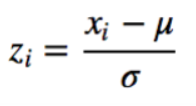

In [20]:
# 단 max나 min처럼 Series 데이터에 적용되는 데이터들은 Key값을 기준으로 Grouped된 데이터 기준('Team' 기준)

score = lambda x: (x - x.mean()) / x.std()
grouped.transform(score)

,Rank,Year,Points
0,-1.500000,-1.161895,1.284327
1,0.500000,-0.387298,0.302029
2,-0.707107,-0.707107,0.707107
3,0.707107,0.707107,-0.707107
4,1.154701,-1.091089,-0.860862
5,NaN,NaN,NaN
6,-0.577350,0.218218,-0.236043
7,-0.577350,0.872872,1.096905
8,0.500000,0.387298,-0.770596
9,0.707107,-0.707107,-0.707107


### Groupby - Filter

- 특정 조건으로 데이터를 검색할 때 사용

In [21]:
# filter 안에는 boolean 조건이 존재해야 함
# len(x)는 grouped된 dataframe 개수

df.groupby('Team').filter(lambda x: len(x) >= 3)    # 데이터가 적어도 3개 이상인 것만 보여줘

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
4,Kings,3,2014,741
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
11,Riders,2,2017,690


In [22]:
df.groupby('Team').filter(lambda x: x['Rank'].sum() > 2)

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863
3,Devils,3,2015,673
4,Kings,3,2014,741
5,kings,4,2015,812
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
9,Royals,4,2014,701


In [23]:
df.groupby('Team').filter(lambda x: x['Points'].sum() > 1000)

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863
3,Devils,3,2015,673
4,Kings,3,2014,741
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
9,Royals,4,2014,701
10,Royals,1,2015,804


In [24]:
df.groupby('Team').filter(lambda x: x['Rank'].mean() > 1)

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863
3,Devils,3,2015,673
4,Kings,3,2014,741
5,kings,4,2015,812
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
9,Royals,4,2014,701


## <Groupby 명령어를 통해 다양한 데이터를 추출하는 여러가지 방법 예시>
### Data

- 시간과 데이터 종류가 정리된 통화량 데이터

In [25]:
import dateutil

df_phone = pd.read_csv('data/phone_data.csv')
df_phone['date'] = df_phone['date'].apply(dateutil.parser.parse, dayfirst = True)    # dateutil.parser.parse : 문자열을 Datetime으로 변경하여 보기 편한 형태로 만들 때 / dayfirst : DD-MM-YYYY 형식일 때
df_phone.head()

,index,date,duration,item,month,network,network_type
0,0,2014-10-15 06:58:00,34.429,data,2014-11,data,data
1,1,2014-10-15 06:58:00,13.000,call,2014-11,Vodafone,mobile
2,2,2014-10-15 14:46:00,23.000,call,2014-11,Meteor,mobile
3,3,2014-10-15 14:48:00,4.000,call,2014-11,Tesco,mobile
4,4,2014-10-15 17:27:00,4.000,call,2014-11,Tesco,mobile


In [26]:
df_phone.groupby('month')['duration'].sum()

month
2014-11    26639.441
2014-12    14641.870
2015-01    18223.299
2015-02    15522.299
2015-03    22750.441
Name: duration, dtype: float64

In [27]:
df_phone[df_phone['item'] == 'call'].groupby('network')['duration'].sum()

network
Meteor        7200.0
Tesco        13828.0
Three        36464.0
Vodafone     14621.0
landline     18433.0
voicemail     1775.0
Name: duration, dtype: float64

In [28]:
df_phone.groupby(['month', 'item'])['date'].count()

month    item
2014-11  call    107
         data     29
         sms      94
2014-12  call     79
         data     30
         sms      48
2015-01  call     88
         data     31
         sms      86
2015-02  call     67
         data     31
         sms      39
2015-03  call     47
         data     29
         sms      25
Name: date, dtype: int64

In [29]:
df_phone.groupby(['month', 'item'])['date'].count().unstack()

item,call,data,sms
month,,,
2014-11,107,29,94
2014-12,79,30,48
2015-01,88,31,86
2015-02,67,31,39
2015-03,47,29,25


In [30]:
df_phone.groupby('month', as_index = False).agg({'duration' : 'sum'})     # agg({column의 이름 : aggregation function})

,month,duration
0,2014-11,26639.441
1,2014-12,14641.870
2,2015-01,18223.299
3,2015-02,15522.299
4,2015-03,22750.441


In [31]:
df_phone.groupby(['month', 'item']).agg({'duration' : sum, 
                                         'network_type' : 'count', 
                                         'date' : 'first'})         # 첫번째로 나오는 날짜

duration  network_type                date
month   item                                             
2014-11 call  25547.000           107 2014-10-15 06:58:00
        data    998.441            29 2014-10-15 06:58:00
        sms      94.000            94 2014-10-16 22:18:00
2014-12 call  13561.000            79 2014-11-14 17:24:00
        data   1032.870            30 2014-11-13 06:58:00
        sms      48.000            48 2014-11-14 17:28:00
2015-01 call  17070.000            88 2014-12-15 20:03:00
        data   1067.299            31 2014-12-13 06:58:00
        sms      86.000            86 2014-12-15 19:56:00
2015-02 call  14416.000            67 2015-01-15 10:36:00
        data   1067.299            31 2015-01-13 06:58:00
        sms      39.000            39 2015-01-15 12:23:00
2015-03 call  21727.000            47 2015-02-12 20:15:00
        data    998.441            29 2015-02-13 06:58:00
        sms      25.000            25 2015-02-19 18:46:00

In [32]:
# 하나 이상의 aggregation 적용을 할 수 있음

df_phone.groupby(['month', 'item']).agg({'duration' : [min, max, sum], 
                                         'network_type' : 'count', 
                                         'date' : [min, 'first', 'nunique']})    # nunique : number of unique

duration                       network_type                date  \
                  min        max        sum        count                 min   
month   item                                                                   
2014-11 call    1.000   1940.000  25547.000          107 2014-10-15 06:58:00   
        data   34.429     34.429    998.441           29 2014-10-15 06:58:00   
        sms     1.000      1.000     94.000           94 2014-10-16 22:18:00   
2014-12 call    2.000   2120.000  13561.000           79 2014-11-14 17:24:00   
        data   34.429     34.429   1032.870           30 2014-11-13 06:58:00   
        sms     1.000      1.000     48.000           48 2014-11-14 17:28:00   
2015-01 call    2.000   1859.000  17070.000           88 2014-12-15 20:03:00   
        data   34.429     34.429   1067.299           31 2014-12-13 06:58:00   
        sms     1.000      1.000     86.000           86 2014-12-15 19:56:00   
2015-02 call    1.000   1863.000  14416.000           67 2015-01-15 10:36:00   
        data   34.429     34.429   1067.299           31 2015-01-13 06:58:00   
        sms     1.000      1.000     39.000           39 2015-01-15 12:23:00   
2015-03 call    2.000  10528.000  21727.000           47 2015-02-12 20:15:00   
        data   34.429     34.429    998.441           29 2015-02-13 06:58:00   
        sms     1.000      1.000     25.000           25 2015-02-19 18:46:00   

                                          
                           first nunique  
month   item                              
2014-11 call 2014-10-15 06:58:00     104  
        data 2014-10-15 06:58:00      29  
        sms  2014-10-16 22:18:00      79  
2014-12 call 2014-11-14 17:24:00      76  
        data 2014-11-13 06:58:00      30  
        sms  2014-11-14 17:28:00      41  
2015-01 call 2014-12-15 20:03:00      84  
        data 2014-12-13 06:58:00      31  
        sms  2014-12-15 19:56:00      58  
2015-02 call 2015-01-15 10:36:00      67  
        data 2015-01-13 06:58:00      31  
        sms  2015-01-15 12:23:00      27  
2015-03 call 2015-02-12 20:15:00      47  
        data 2015-02-13 06:58:00      29  
        sms  2015-02-19 18:46:00      17

In [33]:
grouped = df_phone.groupby('month').agg({'duration' : [min, max, np.mean]})

grouped.columns = grouped.columns.droplevel(level = 0)      # 'duration'이라는 상위 column 이름을 삭제
grouped.rename(columns = {'min' : 'min_duration', 'max' : 'max_duration', 'mean' : 'mean_duration'})

,min_duration,max_duration,mean_duration
month,,,
2014-11,1.0,1940.0,115.823657
2014-12,1.0,2120.0,93.260318
2015-01,1.0,1859.0,88.894141
2015-02,1.0,1863.0,113.301453
2015-03,1.0,10528.0,225.251891


In [34]:
grouped = df_phone.groupby('month').agg({'duration' : [min, max, np.mean]})

grouped.columns = grouped.columns.droplevel(level = 0)      # 'duration'이라는 상위 column 이름을 삭제
grouped.add_prefix("duration_")         # column 이름 앞에 prefix를 붙여줌 ★

,duration_min,duration_max,duration_mean
month,,,
2014-11,1.0,1940.0,115.823657
2014-12,1.0,2120.0,93.260318
2015-01,1.0,1859.0,88.894141
2015-02,1.0,1863.0,113.301453
2015-03,1.0,10528.0,225.251891
